In [306]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/up-crime-data-year-2019/MR data - Compiled Data Set.csv


In [307]:
file=pd.read_csv("../input/up-crime-data-year-2019/MR data - Compiled Data Set.csv")
file.head()

,City,Title,Text,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,"Minor molests mute girl, sent to observation home",GHAZIABAD: A 12-year-old boy was sent to an ob...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"8,10",NaN,3.0
1,Ghaziabad,Family out to buy car robbed of Rs 1 lakh by b...,GHAZIABAD: A family that had visited an automo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ghaziabad,"This gang posed as cops to extort youths, couples",GHAZIABAD: Five persons were arrested on Monda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ghaziabad,"Residents object to loud music, thrashed in Gh...","Ghaziabad: Four tenants, including two soldier...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ghaziabad,Man kills self after being refused money for d...,GHAZIABAD: A 25-year-old allegedly committed s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
file=file.drop('Title',axis=1)
file=file.drop('Text',axis=1)
file=file.fillna(0)
file.head()

,City,"Murder Happened with reason:\n1:Property/Land Disputes,\n2:Family Dispute\n3:Petty Quarrels,\n4:Money Disputes, \n5:Personal Vendetta, \n6:Love Affairs, \n7:Casteism\n8: Unknown/other",Number of child victims,Number of male victims(adult),Number of female victims(adult),Kidnnaping:\nNumber of child victims,Number of male(adult),Number of female(adult),Crime Against Women ( Combined ):\n1. Murder with Rape \n2. Dowry Deaths(Sec. 3048)\n3. Suicide(sec 305/306)\n4. Kidnapping(All)\n5. Acid Attack(Sec. 326A IPC)\n6. Cruelty by Husband/in-laws((Sec.498 A IPC)\n7. Rape only(Sec. 376 or 511 IPC)\n8. Assault on Women with Intent to Outrage her Modesty (Sec. 354 IPC)\n9. Cyber Crimes against Women\n10. Protection of Children from Sexual Offences Act,Number of adult victims,Number of childs invoved
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [309]:
file.columns=[i for i in range(0,len(file.columns))]
file.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,"8,10",0.0,3.0
1,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,Ghaziabad,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [310]:
ex=file[8].str.split(",",n=2,expand=True)
file[11]=ex[0]
file[12]=ex[1]
file[13]=ex[2]
file=file.fillna(0)
file.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
461,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,7,1.0,0.0,7,0,0
462,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0,1,0,0
463,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,"3,8",0.0,1.0,3,8,0
464,Lucknow,0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0,0.0,8,0,0
465,Lucknow,Petty Quarrels,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0


In [311]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Crime against women')

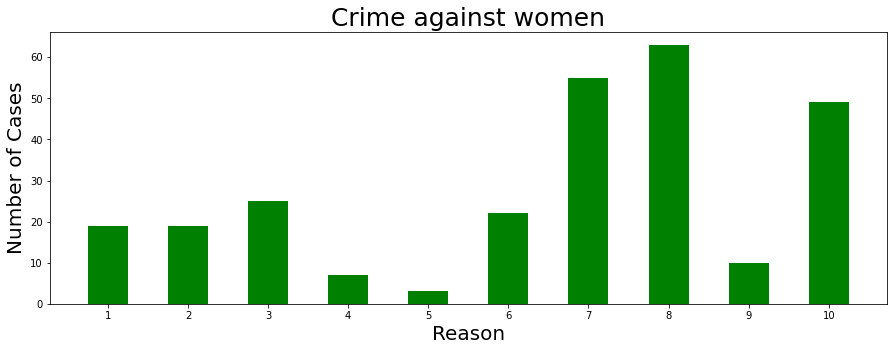

In [312]:
count=[0,0,0,0,0,0,0,0,0,0];
for i in range(len(file)) :
    for j in range(1,11) :
        if int(file.iloc[i,11])==(j) or int(file.iloc[i,12])==(j) or int(file.iloc[i,13])==(j) :
            count[j-1]=count[j-1]+1
reason = list(("1","2","3","4","5","6","7","8","9","10"))
plt.figure(figsize=(15,5))
plt.bar(reason, count, width = 0.5, color='green')
plt.xlabel("Reason",fontsize=20)
plt.ylabel("Number of Cases",fontsize=20)
plt.title("Crime against women",fontsize=25)

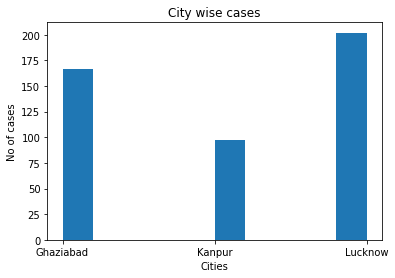

In [313]:
plt.hist(file[0])
plt.xlabel("Cities")
plt.ylabel("No of cases")
plt.title("City wise cases")
plt.show()

Text(0.5, 1.0, 'Reason wise Comparison')

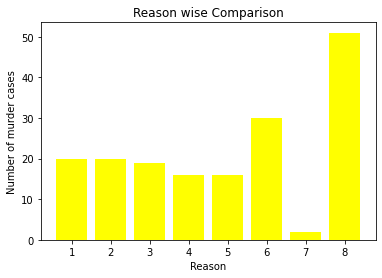

In [314]:
dict={0:0,'Property Disputes':1,'Family Dispute':2,'Petty Quarrels':3,'Money Disputes':4, 'Personal Vendetta':5, 'Love Affairs':6, 'Casteism':7,'Unknown reasons':8}
file[1]=file[1].apply(lambda x : dict[x])
#file.tail()
var=[0,0,0,0,0,0,0,0];
for i in range(len(file)) :
    if(file.iloc[i,1]!=0):
        var[file.iloc[i,1]-1]=var[file.iloc[i,1]-1]+file.iloc[i,2]+file.iloc[i,3]+file.iloc[i,4]
reason = list(("1","2","3","4","5","6","7","8"))
plt.bar(reason, var,color="yellow")
plt.xlabel("Reason")
plt.ylabel("Number of murder cases")
plt.title("Reason wise Comparison")